In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [2]:

def load_image(path_image):
    img = cv2.imread(path_image)
    return img[...,::-1] #BGR to RGB

In [3]:
def image_mask(image, lower, upper):
    original = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(image, lower, upper)

    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(original, (x, y), (x + w, y + h), (36,255,12), 2)

    return mask

Alto : 3468
Ancho : 4624
Canales : 3


Text(0.5, 1.0, 'Blanco')

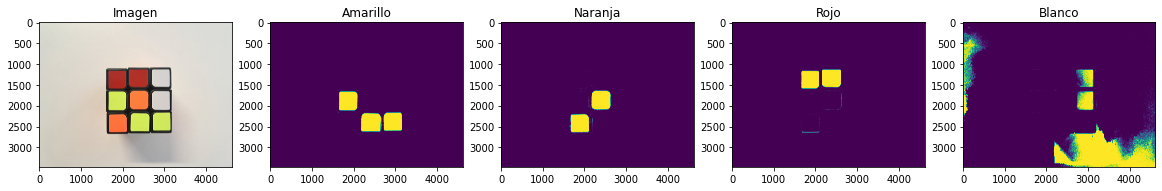

In [4]:
img = cv2.imread('Cubo/cubo_01.jpg')
org_img = load_image('Cubo/cubo_01.jpg')

print(f'Alto : {img.shape[0]}')
print(f'Ancho : {img.shape[1]}')
print(f'Canales : {img.shape[2]}')

fig, axs = plt.subplots(1,5,figsize=(20,5))

axs[0].imshow(org_img)
axs[0].set_title('Imagen')

lower_yellow = np.array([22, 93, 0], dtype="uint8")
upper_yellow = np.array([45, 255, 255], dtype="uint8")
fig_img = axs[1].imshow(image_mask(img, lower_yellow, upper_yellow))
axs[1].set_title('Amarillo')


lower_orange = np.array([5, 100, 20], dtype="uint8")
upper_orange = np.array([25, 255, 255], dtype="uint8")
fig_img = axs[2].imshow(image_mask(img, lower_orange, upper_orange))
axs[2].set_title('Naranja')

lower_red = np.array([0, 100, 50], dtype="uint8")
upper_red = np.array([5, 255, 255], dtype="uint8")
fig_img = axs[3].imshow(image_mask(img, lower_red, upper_red))
axs[3].set_title('Rojo')

lower_white = np.array([0, 0, 168], dtype="uint8")
upper_white = np.array([172, 15, 215], dtype="uint8")
fig_img = axs[4].imshow(image_mask(img, lower_white, upper_white))
axs[4].set_title('Blanco')